In [3]:
####### os, pickle
import os
import pickle

from collections import Counter
from imblearn.over_sampling import SMOTE 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay

os.chdir('../')
from Funciones.funciones import* 
from main import *
os.chdir('./Modelos')

X_cat: (54484, 6365) y_cat: (54484,)
X: (54484, 10113) y: (54484, 1)


In [4]:
#X_balanceado.head()
X_cat.head()

Rubro1_Artículos de electrónica  \
id_producto                                       
2792-88-LE21-1                                0   
1704-52-LP21-1                                0   
1003-20-L121-1                                0   
4236-21-L121-1                                0   
4236-21-L121-2                                0   

                Rubro1_Artículos de fabricación y producción  \
id_producto                                                    
2792-88-LE21-1                                             0   
1704-52-LP21-1                                             0   
1003-20-L121-1                                             0   
4236-21-L121-1                                             0   
4236-21-L121-2                                             0   

                Rubro1_Artículos eléctricos y de iluminación  \
id_producto                                                    
2792-88-LE21-1                                             0   
1704-52-LP21-1                                             0   
1003-20-L121-1                                             0   
4236-21-L121-1                                             0   
4236-21-L121-2                                             0   

                Rubro1_Artículos para estructuras, obras y construcciones  \
id_producto                                                                 
2792-88-LE21-1                                                  0           
1704-52-LP21-1                                                  0           
1003-20-L121-1                                                  0           
4236-21-L121-1                                                  0           
4236-21-L121-2                                                  0           

                Rubro1_Artículos para plantas y animales  \
id_producto                                                
2792-88-LE21-1                                         0   
1704-52-LP21-1                                         0   
1003-20-L121-1                                         0   
4236-21-L121-1                                         0   
4236-21-L121-2                                         0   

                Rubro1_Combustibles, lubricantes y anticorrosivos  \
id_producto                                                         
2792-88-LE21-1                                                  0   
1704-52-LP21-1                                                  0   
1003-20-L121-1                                                  0   
4236-21-L121-1                                                  0   
4236-21-L121-2                                                  0   

                Rubro1_Consultoria  \
id_producto                          
2792-88-LE21-1                   0   
1704-52-LP21-1                   0   
1003-20-L121-1                   0   
4236-21-L121-1                   0   
4236-21-L121-2                   0   

                Rubro1_Educación, formación, entrenamiento y capacitación  \
id_producto                                                                 
2792-88-LE21-1                                                  0           
1704-52-LP21-1                                                  0           
1003-20-L121-1                                                  0           
4236-21-L121-1                                                  0           
4236-21-L121-2                                                  0           

                Rubro1_Equipamiento para el acondicionamiento, distribución y filtrado de fluidos  \
id_producto                                                                                         
2792-88-LE21-1                                                  0                                   
1704-52-LP21-1                                                  0                                   
1003-20-L121-1                                                  0                                   
423

In [18]:
Counter(y_cat)
#Counter(y_balanceado_redux)

Counter({0: 4525, 1: 586})

## Entrenamiento con variables categoricas Mercado Publico (sólo dummies)

In [19]:

X_train, X_test, y_train, y_test = train_test_split(
    X_cat, y_cat, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y


In [23]:
clf = LogisticRegression(
    solver='lbfgs', 
    penalty='l2',
    multi_class='ovr',
    max_iter=500,
    C= 0.1,
    n_jobs=-1,
    verbose=1) # la forma del GD
clf = clf.fit(X_train_smote, y_train_smote)
Y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   31.8s finished


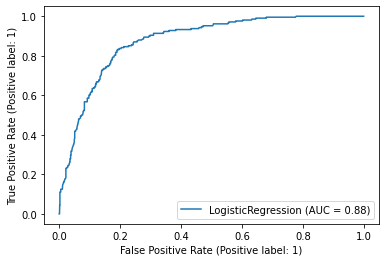

Train AUC 0.9259745628754164
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      3046
           1       0.87      0.07      0.13       378

    accuracy                           0.90      3424
   macro avg       0.88      0.54      0.54      3424
weighted avg       0.89      0.90      0.86      3424



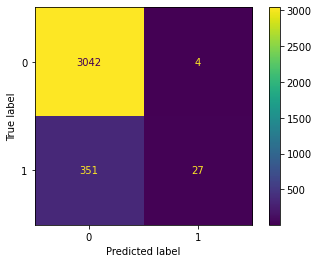

Test AUC 0.8772673193946013
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1479
           1       0.87      0.10      0.17       208

    accuracy                           0.89      1687
   macro avg       0.88      0.55      0.56      1687
weighted avg       0.88      0.89      0.84      1687



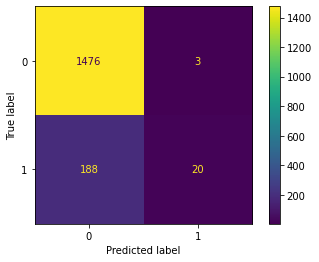

In [24]:
x07 = metrics(clf, X_train, X_test, y_train, y_test, thr=0.5)
x07

In [46]:
os.chdir(r'Modelos')
#os.chdir(r'C:\Users\metal\Trabajos Bootcamp\Proyecto Final\juanito_v2.0\Modelos')

In [47]:
fh = open('m_reglog_cat.pkl','wb')
#fh = open('df_smote30_train_test(redux).pkl','wb')
pickle.dump(clf,fh)
fh.close()

## Ahora entrenamos el modelo con variables creadas a partir del campo DESCRIPCION y solo variable categorica Rubro 1

In [3]:
### ojo que cambió la X ahora tiene solo categorías filtras por CatBoosting
X.shape

(51646, 10055)

In [4]:
y.shape

(51646,)

In [13]:
logreg = LogisticRegression()
dir(logreg)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'warm_start']

In [5]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
''' parametros definidos anteriormente   
    solver='lbfgs', 
    penalty='l2',
    multi_class='ovr',
    max_iter=500,
    C= 0.1,
    n_jobs=-1,
    verbose=1'''

params = {
    'C': [1.00,0.05], #valores que tomará la Inverse of regularization strength [1.00,0.05,0.01]
    #'class_weight': None,
    #'dual': False,
    #'fit_intercept': True,
    #'intercept_scaling': 1,
    #'l1_ratio': None,
    'max_iter': [500], #Maximum number of iterations taken for the solvers to converge.
    'multi_class': ['ovr'], #‘ovr’, then a binary problem is fit for each label
    #'n_jobs': None,  # lo definiremos en el gridsearch
    'penalty': ['l2']
    #'random_state': None, # lo aplicaremos en el gridsearch
    #'solver': 'lbfgs',  # usamos el que viene por default, ‘liblinear’ is limited to one-versus-rest schemes
    #'tol': 0.0001, #dejamos por defecto el criterio de tolerancia para detener la iteracion
    #'verbose': 0 #dejamos valor por defecto
    #'warm_start': False
    }


In [26]:
scoring = ['roc_auc']
grid_solver = GridSearchCV(estimator = logreg, # model to train
                   param_grid = params,
                   scoring = scoring,
                   cv = 3,  #aplica cross validation utilizando un stratified KFold
                   n_jobs=-1,
                   refit = 'roc_auc',
                   verbose = 2)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y


In [27]:
model_result_logreg = grid_solver.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [28]:
model_result_logreg.best_params_

{'C': 1.0, 'max_iter': 500, 'multi_class': 'ovr', 'penalty': 'l2'}

In [29]:
model_result_logreg.cv_results_

{'mean_fit_time': array([144.08115506, 164.2935257 ]),
 'std_fit_time': array([31.58270605,  6.53674108]),
 'mean_score_time': array([7.5431246 , 8.76940028]),
 'std_score_time': array([1.62943634, 1.18339523]),
 'param_C': masked_array(data=[1.0, 0.05],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[500, 500],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_multi_class': masked_array(data=['ovr', 'ovr'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l2'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1.0, 'max_iter': 500, 'multi_class': 'ovr', 'penalty': 'l2'},
  {'C': 0.05, 'max_iter': 500, 'multi_class': 'ovr', 'penalty': 'l2'}],
 'split0_test_roc_auc': array([0.9810059 , 0.96574493]),
 'split1_test_roc_auc': array([0.

In [32]:
os.chdir(r'Modelos')
#os.chdir(r'C:\Users\metal\Trabajos Bootcamp\Proyecto Final\juanito_v2.0\Modelos')
fh = open('m_reglog_PCA','wb')
#fh = open('df_smote30_train_test(redux).pkl','wb')
pickle.dump(model_result_logreg,fh)
fh.close()

In [33]:
results_cv=model_result_logreg.cv_results_
results=pd.DataFrame(results_cv)
results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0     144.081155     31.582706         7.543125        1.629436     1.0   
1     164.293526      6.536741         8.769400        1.183395    0.05   

  param_max_iter param_multi_class param_penalty  \
0            500               ovr            l2   
1            500               ovr            l2   

                                              params  split0_test_roc_auc  \
0  {'C': 1.0, 'max_iter': 500, 'multi_class': 'ov...             0.981006   
1  {'C': 0.05, 'max_iter': 500, 'multi_class': 'o...             0.965745   

   split1_test_roc_auc  split2_test_roc_auc  mean_test_roc_auc  \
0             0.984968             0.985702           0.983892   
1             0.965520             0.968009           0.966425   

   std_test_roc_auc  rank_test_roc_auc  
0          0.002062                  1  
1          0.001124                  2

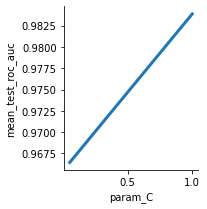

In [34]:
sns.relplot(x="param_C",
            y="mean_test_roc_auc",
            #style="param_max_features",
            #hue="param_min_impurity_decrease",
            kind = "line",
            palette=["r", "b"],
            height=3, linewidth=3, data=results)


In [38]:
type(model_result_logreg.best_estimator_)

sklearn.linear_model._logistic.LogisticRegression

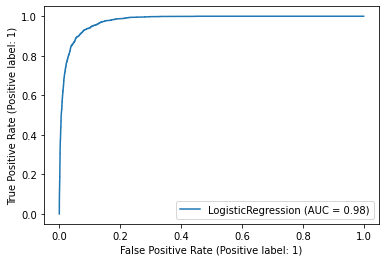

Train AUC 0.9892381270593935
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     31010
           1       0.91      0.90      0.91      9303

    accuracy                           0.96     40313
   macro avg       0.94      0.94      0.94     40313
weighted avg       0.96      0.96      0.96     40313



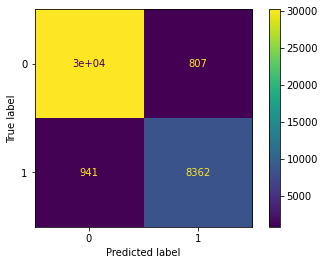

Test AUC 0.9773810380901445
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     15260
           1       0.76      0.80      0.78      1784

    accuracy                           0.95     17044
   macro avg       0.87      0.88      0.88     17044
weighted avg       0.95      0.95      0.95     17044



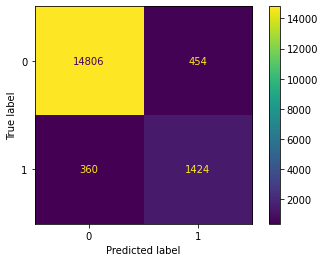

In [39]:
metrics(model_result_logreg.best_estimator_, X_train_smote, X_test, y_train_smote, y_test, thr=0.5)

### Entrenamiento modelo con variables categoricas filtradas por Catboost y con descomposición del campo descripción en PCA del vector de palabras (bag of words)

In [3]:
X.index = X['id_producto']
X.drop(columns=['id_producto'], inplace=True)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y


In [10]:
#X_train_smote = np.array(X_train_smote)
#y_train_smote = np.array(y_train_smote)
y_train_smote

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [5]:
logreg = LogisticRegression(
    solver='lbfgs',
    C=1.00, #valores que tomará la Inverse of regularization strength [1.00,0.05,0.01]
    max_iter=500, #Maximum number of iterations taken for the solvers to converge.
    multi_class= 'ovr', #‘ovr’, then a binary problem is fit for each label
    penalty='l2',
    verbose=1)

In [8]:
model = logreg.fit(X_train_smote,y_train_smote)

C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.5s finished


C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


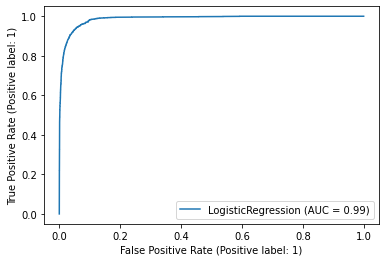

Train AUC 0.9942894519935022
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     32751
           1       0.94      0.93      0.93      9825

    accuracy                           0.97     42576
   macro avg       0.96      0.96      0.96     42576
weighted avg       0.97      0.97      0.97     42576



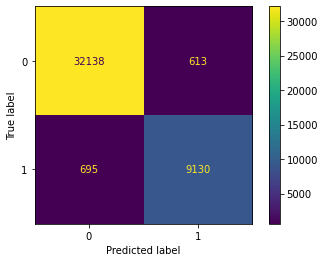

C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Test AUC 0.9870316488255384
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16123
           1       0.82      0.86      0.84      1978

    accuracy                           0.96     18101
   macro avg       0.90      0.92      0.91     18101
weighted avg       0.96      0.96      0.96     18101



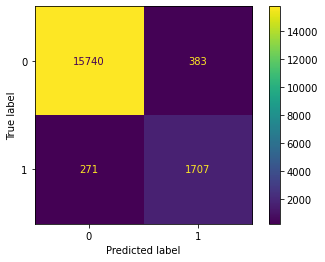

In [9]:
metrics(model, X_train_smote, X_test, y_train_smote, y_test, thr=0.5)

In [ ]:
fh = open('m_reglog_PCA_v2','wb')
#fh = open('df_smote30_train_test(redux).pkl','wb')
pickle.dump(model,fh)
fh.close()

## Entrenamos modelo con nueva variable contador de palabras en campo descripción que está en catálogo de productos

In [5]:
df.head()

descripcion  label  \
id_producto                                                                
2792-88-LE21-1  CÁMARA RETINAL NO MIDRIÁTICA - ESPECIFICACIONE...      0   
1704-52-LP21-1  SERVICIO DE MUDANZA DE ENSERES PROPIOS Y EN US...      0   
1003-20-L121-1                              LEÑA SECA CERTIFICADA      0   
4236-21-L121-1                       MARCADOR BLANCO PARA METALES      0   
4236-21-L121-2                                            PLOMADA      0   

                                               Descripcion limpia  \
id_producto                                                         
2792-88-LE21-1  camara retinal midriatica especificaciones bas...   
1704-52-LP21-1  servicio mudanza enseres propios hospital mart...   
1003-20-L121-1                              leña seca certificada   
4236-21-L121-1                            marcador blanco metales   
4236-21-L121-2                                            plomada   

                                          Descripcion raiz limpia  
id_producto                                                        
2792-88-LE21-1             cam retinal midriat especif bas tecnic  
1704-52-LP21-1  servici mudanz enser propi hospital martin qui...  
1003-20-L121-1                                   leñ sec certific  
4236-21-L121-1                               marcador blanc metal  
4236-21-L121-2                                               plom

In [7]:
df['num palabras catalogo']= df['Descripcion raiz limpia'].apply(lambda texto: count_palabras(texto))
df.head()

descripcion  label  \
id_producto                                                                
2792-88-LE21-1  CÁMARA RETINAL NO MIDRIÁTICA - ESPECIFICACIONE...      0   
1704-52-LP21-1  SERVICIO DE MUDANZA DE ENSERES PROPIOS Y EN US...      0   
1003-20-L121-1                              LEÑA SECA CERTIFICADA      0   
4236-21-L121-1                       MARCADOR BLANCO PARA METALES      0   
4236-21-L121-2                                            PLOMADA      0   

                                               Descripcion limpia  \
id_producto                                                         
2792-88-LE21-1  camara retinal midriatica especificaciones bas...   
1704-52-LP21-1  servicio mudanza enseres propios hospital mart...   
1003-20-L121-1                              leña seca certificada   
4236-21-L121-1                            marcador blanco metales   
4236-21-L121-2                                            plomada   

                                          Descripcion raiz limpia  \
id_producto                                                         
2792-88-LE21-1             cam retinal midriat especif bas tecnic   
1704-52-LP21-1  servici mudanz enser propi hospital martin qui...   
1003-20-L121-1                                   leñ sec certific   
4236-21-L121-1                               marcador blanc metal   
4236-21-L121-2                                               plom   

                num palabras catalogo  
id_producto                            
2792-88-LE21-1                      1  
1704-52-LP21-1                      1  
1003-20-L121-1                      2  
4236-21-L121-1                      2  
4236-21-L121-2                      1

In [8]:
print(X.shape)
X = pd.concat([X,df['num palabras catalogo']], axis=1)
print(X.shape)
X.head()

(54484, 10113)
(54484, 10114)


Rubro1_Equipos y suministros de defensa, orden público, protección y seguridad  \
id_producto                                                                                      
2792-88-LE21-1                                                  0                                
1704-52-LP21-1                                                  0                                
1003-20-L121-1                                                  0                                
4236-21-L121-1                                                  0                                
4236-21-L121-2                                                  0                                

                Rubro2_Materiales estructurales básicos  \
id_producto                                               
2792-88-LE21-1                                        0   
1704-52-LP21-1                                        0   
1003-20-L121-1                                        0   
4236-21-L121-1                                        0   
4236-21-L121-2                                        0   

                Rubro1_Artículos de fabricación y producción  Rubro3_Filtros  \
id_producto                                                                    
2792-88-LE21-1                                             0               0   
1704-52-LP21-1                                             0               0   
1003-20-L121-1                                             0               0   
4236-21-L121-1                                             0               0   
4236-21-L121-2                                             0               0   

                Rubro1_Ropa, maletas y productos de aseo personal  \
id_producto                                                         
2792-88-LE21-1                                                  0   
1704-52-LP21-1                                                  0   
1003-20-L121-1                                                  0   
4236-21-L121-1                                                  0   
4236-21-L121-2                                                  0   

                Rubro2_Vestuario clínico  \
id_producto                                
2792-88-LE21-1                         0   
1704-52-LP21-1                         0   
1003-20-L121-1                         0   
4236-21-L121-1                         0   
4236-21-L121-2                         0   

                Rubro1_Maquinaria para fabricación y transformación industrial  \
id_producto                                                                      
2792-88-LE21-1                                                  0                
1704-52-LP21-1                                                  0                
1003-20-L121-1                                                  0                
4236-21-L121-1                                                  0                
4236-21-L121-2                                                  0                

                Rubro3_Maquinaria para soldadura directa o indirecta  \
id_producto                                                            
2792-88-LE21-1                                                  0      
1704-52-LP21-1                                                  0      
1003-20-L121-1                                                  0      
4236-21-L121-1                                                  0      
4236-21-L121-2                                                  0      

                Rubro2_Herramientas manuales  \
id_producto                                    
2792-88-LE21-1                             0   
1704-52-LP21-1                             0   
1003-20-L121-1                             0   
4236-21-L121-1                             0   
4236-21-L121-2                             1   

                Rubro2_Cintas adhesivas y selladores  ...    PC9991    PC9992  \
id_producto                                           ...      

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y


In [25]:
logreg = LogisticRegression(
    solver='lbfgs',
    C=1.00, #valores que tomará la Inverse of regularization strength [1.00,0.05,0.01]
    max_iter=500, #Maximum number of iterations taken for the solvers to converge.
    multi_class= 'ovr', #‘ovr’, then a binary problem is fit for each label
    penalty='l2',
    verbose=1)

In [26]:
logreg_model = logreg.fit(X_train_smote,y_train_smote)

C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min finished


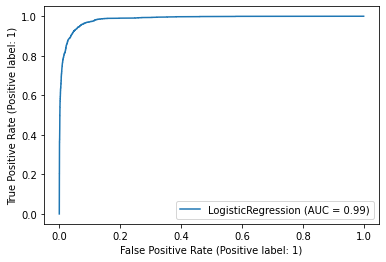

Train AUC 0.9942019684622725
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     32518
           1       0.93      0.93      0.93      9755

    accuracy                           0.97     42273
   macro avg       0.96      0.95      0.95     42273
weighted avg       0.97      0.97      0.97     42273



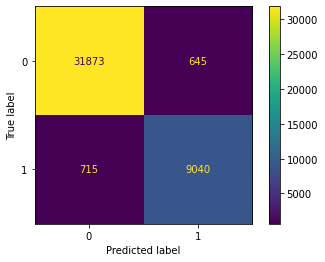

Test AUC 0.9855478183985057
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16016
           1       0.81      0.86      0.83      1964

    accuracy                           0.96     17980
   macro avg       0.90      0.92      0.91     17980
weighted avg       0.96      0.96      0.96     17980



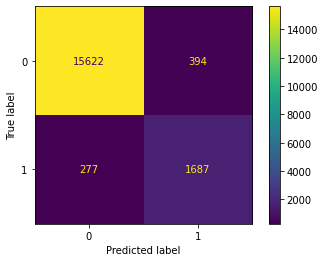

In [27]:
metrics(logreg_model, X_train_smote, X_test, y_train_smote, y_test, thr=0.5)

In [36]:
logreg_model.coef_

array([[ 6.71404229,  3.32508127,  3.69123901, ..., -0.02425822,
         0.25532188,  0.09819848]])

In [35]:
pesos = logreg_model.class_weight
type(pesos)

NoneType

## Analizamos los errores

In [2]:
os.chdir('Modelos')
fh2=open('m_reglog_PCA_v2.pkl','rb')
model=pickle.load(fh2)
fh2.close()


c:\Users\diana\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y

In [5]:
y_pred= pd.DataFrame(model.predict(X_test))
y_pred.rename(columns={0:'y_pred'},inplace=True)
y_pred.index = y_test.index
y_pred

y_pred
id_producto               
3568-84-L121-1           0
1058012-53-LR21-2        0
3540-118-LE21-4          0
3017-186-L121-4          0
3349-54-L121-1           0
...                    ...
1078779-19-L121-10       0
1057432-68-L121-1        0
855-17-LP21-3            0
2111-278-LE21-2          0
4469-75-L121-24          0

[17980 rows x 1 columns]

In [6]:
dferror=pd.merge(df, y_test, left_index=True, right_index=True)

In [7]:
dferror=pd.merge(dferror, y_pred, left_index=True, right_index=True)
dferror

label_x                            Descripcion raiz limpia  \
id_producto                                                                     
1704-52-LP21-1           0  servici mudanz enser propi hospital martin qui...   
4236-21-L121-2           0                                               plom   
4236-21-L121-4           0                           escobillon ase municipal   
4236-21-L121-9           0                                caj lapiz carpinter   
3021-77-L121-22          0             carpet plastific accoclip archiv ofici   
...                    ...                                                ...   
3383-11-LE21-27          0                   suer fisiolog clorur sodi matraz   
1058090-26-LQ21-3        0                                        clindamicin   
1058090-26-LQ21-5        0                                     dexmedetomidin   
1336-30-LE21-2           0                                     piez coig metr   
1058141-35-LQ21-1        0                                       alteplas caj   

                   label_y  y_pred  
id_producto                         
1704-52-LP21-1           0       0  
4236-21-L121-2           0       0  
4236-21-L121-4           0       0  
4236-21-L121-9           0       0  
3021-77-L121-22          0       0  
...                    ...     ...  
3383-11-LE21-27          0       0  
1058090-26-LQ21-3        0       0  
1058090-26-LQ21-5        0       0  
1336-30-LE21-2           0       0  
1058141-35-LQ21-1        0       0  

[17980 rows x 4 columns]

In [8]:
dferror.drop(['label_x'], axis=1, inplace=True)

In [9]:
dferror

Descripcion raiz limpia  label_y  \
id_producto                                                                     
1704-52-LP21-1     servici mudanz enser propi hospital martin qui...        0   
4236-21-L121-2                                                  plom        0   
4236-21-L121-4                              escobillon ase municipal        0   
4236-21-L121-9                                   caj lapiz carpinter        0   
3021-77-L121-22               carpet plastific accoclip archiv ofici        0   
...                                                              ...      ...   
3383-11-LE21-27                     suer fisiolog clorur sodi matraz        0   
1058090-26-LQ21-3                                        clindamicin        0   
1058090-26-LQ21-5                                     dexmedetomidin        0   
1336-30-LE21-2                                        piez coig metr        0   
1058141-35-LQ21-1                                       alteplas caj        0   

                   y_pred  
id_producto                
1704-52-LP21-1          0  
4236-21-L121-2          0  
4236-21-L121-4          0  
4236-21-L121-9          0  
3021-77-L121-22         0  
...                   ...  
3383-11-LE21-27         0  
1058090-26-LQ21-3       0  
1058090-26-LQ21-5       0  
1336-30-LE21-2          0  
1058141-35-LQ21-1       0  

[17980 rows x 3 columns]

In [10]:
dfe=pd.merge(dferror, data, left_index=True, right_index=True)
dfe.drop(['label','id_producto'], axis=1, inplace=True)

## Ejemplos de Falsos positivos

Está arrojando positivos a productos de una CLASE ESPECÍFICA aún cuando la empresa no cuenta con ellos

In [34]:
#Cuando La licitación es positiva pero la predicción es negativa
dfe[(dfe['label_y']==0)&(dfe['y_pred']==1) & (dfe.descripcion.str.contains('PINTUR'))]

Descripcion raiz limpia  label_y  y_pred  \
id_producto                                                                
4236-25-L121-1         pintur acril alto trafic amarill        0       1   
4236-26-L121-1         pintur acril alto trafic amarill        0       1   
1937-24-LE21-1                                   pintur        0       1   
2377-245-L121-1  repuest equip pintur segun list adjunt        0       1   

                 id_licitacion                                 Rubro1  \
id_producto                                                             
4236-25-L121-1    4236-25-L121  Artículos de fabricación y producción   
4236-26-L121-1    4236-26-L121  Artículos de fabricación y producción   
1937-24-LE21-1    1937-24-LE21  Artículos de fabricación y producción   
2377-245-L121-1  2377-245-L121  Artículos de fabricación y producción   

                                                         Rubro2  \
id_producto                                                       
4236-25-L121-1   Pinturas, diluyentes y accesorios para pintado   
4236-26-L121-1   Pinturas, diluyentes y accesorios para pintado   
1937-24-LE21-1   Pinturas, diluyentes y accesorios para pintado   
2377-245-L121-1                         Artículos de ferretería   

                                   Rubro3      nombre_producto  \
id_producto                                                      
4236-25-L121-1                   Pinturas   Pinturas acrílicas   
4236-26-L121-1                   Pinturas   Pinturas acrílicas   
1937-24-LE21-1                   Pinturas  Pinturas al esmalte   
2377-245-L121-1  Accesorios de Ferretería      Kits de montaje   

                                                       descripcion  
id_producto                                                         
4236-25-L121-1              PINTURA ACRILICA ALTO TRAFICO AMARILLA  
4236-26-L121-1              PINTURA ACRILICA ALTO TRAFICO AMARILLA  
1937-24-LE21-1                                           PINTURAS.  
2377-245-L121-1  REPUESTOS PARA EQUIPOS DE PINTURA, SEGÚN LISTA...

In [56]:
dfe[(dfe['label_y']==1)&(dfe['y_pred']==0)&(dfe['nombre_producto']=='Delantal de doctor')]

Descripcion raiz limpia  label_y  y_pred    id_licitacion  \
id_producto                                                                   
1013609-24-LE21-7     delantal blanc tall        1       0  1013609-24-LE21   

                                                       Rubro1 Rubro2  \
id_producto                                                            
1013609-24-LE21-7  Ropa, maletas y productos de aseo personal   Ropa   

                      Rubro3     nombre_producto              descripcion  
id_producto                                                                
1013609-24-LE21-7  Uniformes  Delantal de doctor  delantal blanco talla M

Falsos positivos al seleccionar productos SIMILARES
a los que se han vendido pero la empresa realmente nunca ha contado con ellos en el stock.

In [48]:
#Productos que se han vendido y que si existen en el inventario
dfe[(dfe['label_y']==1)&(dfe['y_pred']==1)&(dfe['Rubro3']=='Pinturas')]

Descripcion raiz limpia  label_y  \
id_producto                                                                     
1001048-3-LE21-32                pintur blanc alto trafic renn simil        1   
2345-104-L121-24                   pintur spray brillant color blanc        1   
2799-26-CO21-13    line pintur product quimic acuerd detall señal...        1   
3166-29-L121-5           pintur esmalt spray onzas gram color naranj        1   
3540-88-L121-16                      galon pintur sintet amarill agu        1   

                   y_pred   id_licitacion  \
id_producto                                 
1001048-3-LE21-32       1  1001048-3-LE21   
2345-104-L121-24        1   2345-104-L121   
2799-26-CO21-13         1    2799-26-CO21   
3166-29-L121-5          1    3166-29-L121   
3540-88-L121-16         1    3540-88-L121   

                                                  Rubro1  \
id_producto                                                
1001048-3-LE21-32  Artículos de fabricación y producción   
2345-104-L121-24   Artículos de fabricación y producción   
2799-26-CO21-13    Artículos de fabricación y producción   
3166-29-L121-5     Artículos de fabricación y producción   
3540-88-L121-16    Artículos de fabricación y producción   

                                                           Rubro2    Rubro3  \
id_producto                                                                   
1001048-3-LE21-32  Pinturas, diluyentes y accesorios para pintado  Pinturas   
2345-104-L121-24   Pinturas, diluyentes y accesorios para pintado  Pinturas   
2799-26-CO21-13    Pinturas, diluyentes y accesorios para pintado  Pinturas   
3166-29-L121-5     Pinturas, diluyentes y accesorios para pintado  Pinturas   
3540-88-L121-16    Pinturas, diluyentes y accesorios para pintado  Pinturas   

                       nombre_producto  \
id_producto                              
1001048-3-LE21-32   Pinturas aceitosas   
2345-104-L121-24   Pinturas en aerosol   
2799-26-CO21-13     Pinturas aceitosas   
3166-29-L121-5     Pinturas en aerosol   
3540-88-L121-16    Pinturas al esmalte   

                                                         descripcion  
id_producto                                                           
1001048-3-LE21-32  Pintura blanca alto trafico (lt) Renner o similar  
2345-104-L121-24     PINTURA EN SPRAY BRILLANTE 340 GR COLOR BLANCO.  
2799-26-CO21-13    LINEA 13: Pintura y productos químicos, de acu...  
3166-29-L121-5     5.PINTURA ESMALTE  SPRAY 16 ONZAS (453.5 GRAMO...  
3540-88-L121-16    Galón de pintura sintética amarilla contra agua\n

In [24]:
#Hace predicciones según productos que no existen en el inventario
dfe[(dfe['label_y']==0)&(dfe['y_pred']==1)&(dfe['nombre_producto']=='Pinturas acrílicas')]

Descripcion raiz limpia  label_y  y_pred  \
id_producto                                                         
4236-25-L121-1  pintur acril alto trafic amarill        0       1   
4236-26-L121-1  pintur acril alto trafic amarill        0       1   

               id_licitacion                                 Rubro1  \
id_producto                                                           
4236-25-L121-1  4236-25-L121  Artículos de fabricación y producción   
4236-26-L121-1  4236-26-L121  Artículos de fabricación y producción   

                                                        Rubro2    Rubro3  \
id_producto                                                                
4236-25-L121-1  Pinturas, diluyentes y accesorios para pintado  Pinturas   
4236-26-L121-1  Pinturas, diluyentes y accesorios para pintado  Pinturas   

                   nombre_producto                             descripcion  
id_producto                                                                 
4236-25-L121-1  Pinturas acrílicas  PINTURA ACRILICA ALTO TRAFICO AMARILLA  
4236-26-L121-1  Pinturas acrílicas  PINTURA ACRILICA ALTO TRAFICO AMARILLA

## Análisis

En muchos casos, la descripción cuenta con muy poca información y tampoco concuerda con el nombre del producto.

In [67]:
dfe[(dfe['label_y']==0)&(dfe['y_pred']==0)&(dfe['Rubro3']=='Pinturas')].head(1)

Descripcion raiz limpia  label_y  y_pred id_licitacion  \
id_producto                                                             
4236-25-L121-3                  imprim        0       0  4236-25-L121   

                                               Rubro1  \
id_producto                                             
4236-25-L121-3  Artículos de fabricación y producción   

                                                        Rubro2    Rubro3  \
id_producto                                                                
4236-25-L121-3  Pinturas, diluyentes y accesorios para pintado  Pinturas   

                                   nombre_producto descripcion  
id_producto                                                     
4236-25-L121-3  Pinturas de imprimación al esmalte  IMPRIMANTE